# Predicting Customer Churn in SyriaTel

## 1. Overview

a). Business Understanding

SyriaTel, a company in the telecommunication industry, has approached us with a pressing challenge: high customer churn rates are leading to financial losses and decreased customer satisfaction. To combat this issue, SyriaTel aims to accurately predict which customers are likely to leave, allowing them to take proactive measures to retain them. However, traditional methods for predicting customer churn have proven to be unreliable, with high rates of false positives and false negatives.

In light of this, SyriaTel has tasked us with developing a machine learning classification model that can accurately predict customer churn based on historical usage patterns and demographic information. Our goal is to create a model that will help SyriaTel minimize financial losses and improve customer satisfaction.

Problem Statement

The telecommunication industry is facing a challenge of high customer churn rates, leading to financial losses and decreased customer satisfaction. Traditional methods for predicting customer churn have high false-positive and false-negative rates, making it difficult for companies such as SyriaTel to accurately identify which customers are at risk of leaving and take proactive measures to retain them.

Objectives

The primary objective of this project is to reduce customer churn, which is the loss of customers to competitors. By predicting which customers are at risk of leaving

Identify which features/predictor variables affect the attrition of customers.

Build 3 Classification models and evaluate the best one for classifying and predicting the churn rate

Metric of success

The project wil be considered a success if the classification model accurately identifies a high proportion of actual churners(High Recall) with a low number of false positive predictions(Low False Positive Rate) and demonstrates good generalization performance(Accuracy of 80% on unseen dataset).

## b). Data Understanding.

The dataset used was obtained from Kaggle (Churn in Telecom's dataset) and comprises of 3333 rows and 21 columns. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The churn column will be used as our target variable

This is a binary classification problem where the goal is to predict the likelihood of a customer churning and the churn column will be represented by 1 - True and 0 - False

# 2. Data Pre-Processing

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

# # sklearn classification models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# from imblearn.over_sampling import SMOTE

# #sklearn evaluation metrics and validation
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_curve, auc
# from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report



Loading the data set

In [115]:

df = pd.read_csv('data set/bigml_59c28831336c6604c800002a.csv')
data = df.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [116]:
# Get a brief overview using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has 3333 records with 21 columns or features. These features include information about the customer's state, account length, area code, phone number, international plan, voice mail plan, and call usage details (minutes and charges) for different time periods (day, evening, night, international). The last column, "churn", is the target variable indicating whether the customer has churned or not. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The data does not contain any missing values

In [117]:
# Get statistical description of the data using .describe()
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [118]:
#Get the value counts of the target variable using .value_counts()
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [119]:
# View the Unique Values using .nunique()
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [120]:
# Preview the top of the dataset
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [121]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


a) Checking for missing values

In [122]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values count for each column:")
print(missing_values)

# Check if there are any missing values in the DataFrame
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("There are missing values in the dataset.")

Missing values count for each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
No missing values found.


In [123]:
# Checking duplicated rows
data.duplicated().sum()


0

In [124]:
# Checking for duplicate in phone number
duplicates_numbers = data.duplicated(subset ='phone number')
duplicates_numbers.unique()

array([False])

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

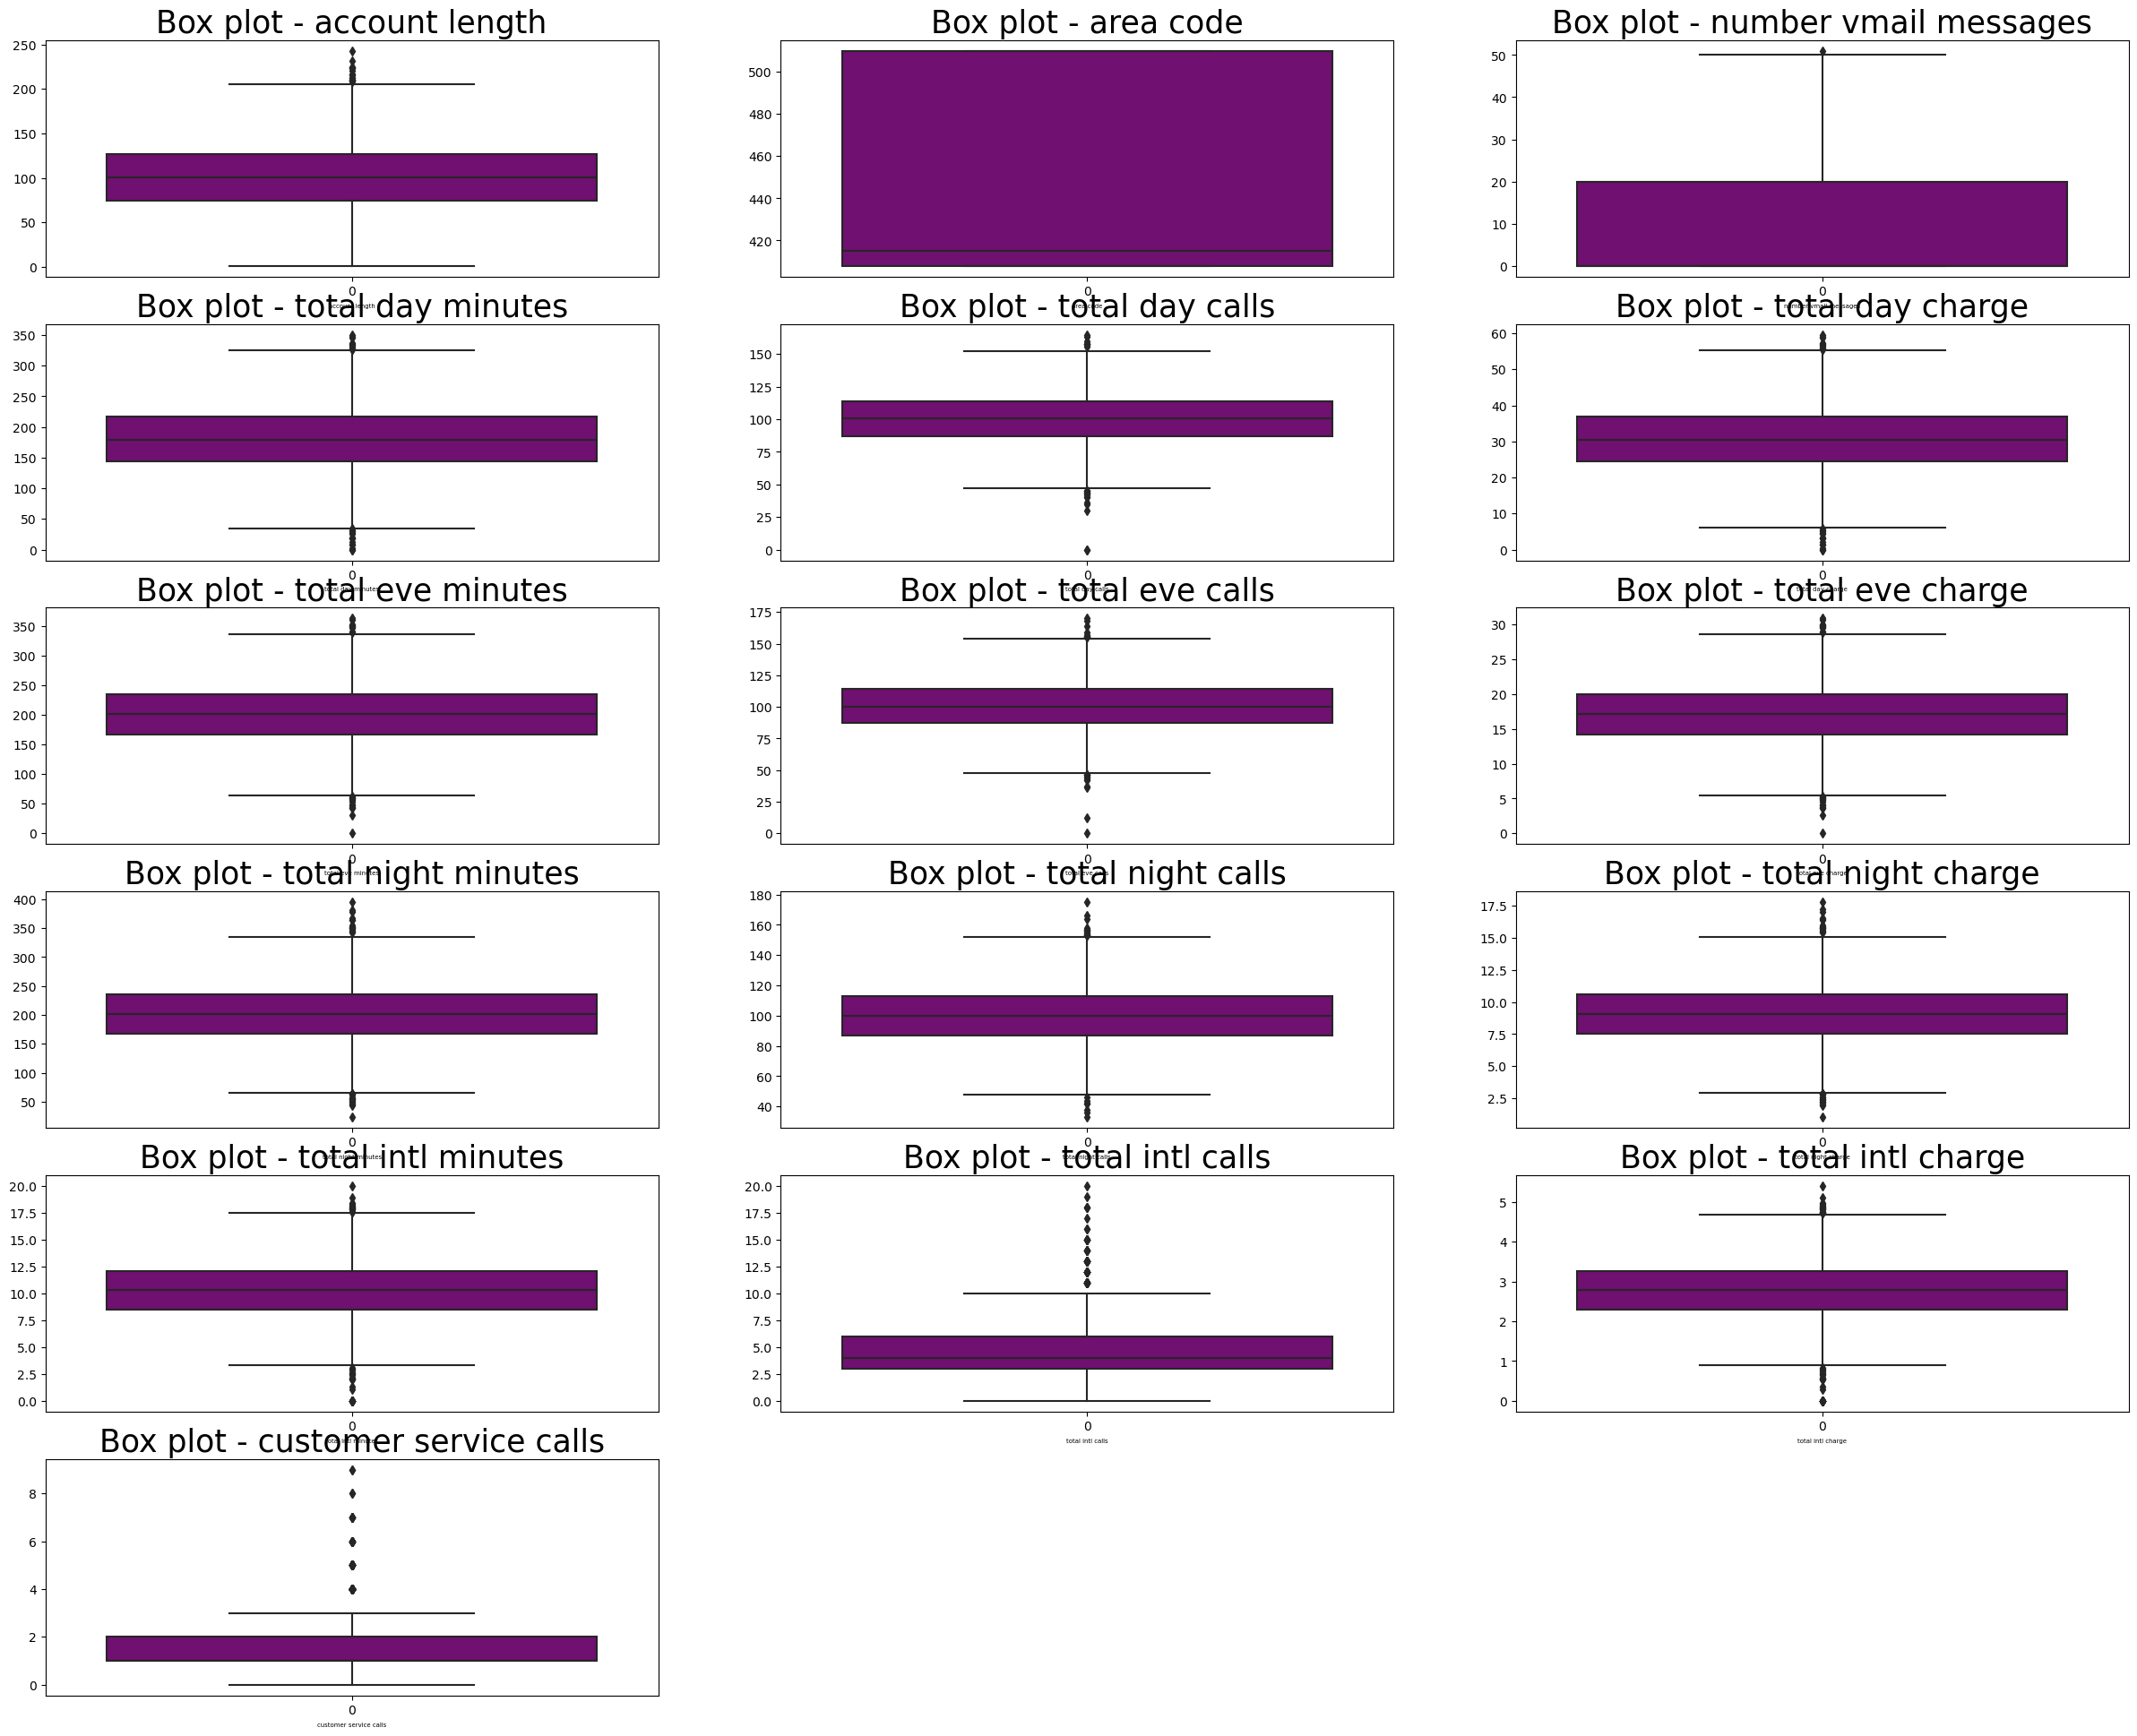

In [125]:
# Creating a list of columns with numeric values
numeric_cols = data.select_dtypes('number').columns

# Calculate the number of rows and columns for subplots
num_rows = (len(numeric_cols) - 1) // 3 + 1
num_cols = min(len(numeric_cols), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each numeric column
for i, column in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data[column], ax=axes[row, col], color='purple')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=25)
    axes[row, col].set_xlabel(column, fontsize=5)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout

In [126]:
# Checking for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = data[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

Conversion of data types

In [127]:

# Checking data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = data[columns].dtypes
print(column_data_types)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


In [128]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
data["churn"] = data["churn"].astype(int)
print(data["churn"].dtype)

int32


In [129]:
# Convert "State" column to categorical data type
data["area code"] = data["area code"].astype("str")
print(data["area code"].dtype)


object


Dropping of columns


In [130]:
# Drop the 'phone number' column
data.drop(columns=['phone number'], inplace=True)

 The sales and marketing department will not need to include phone numbers in their sales stategy or ad campaigns.

## 3. Exploratory Data Analysis

 Univariate Data Analysis

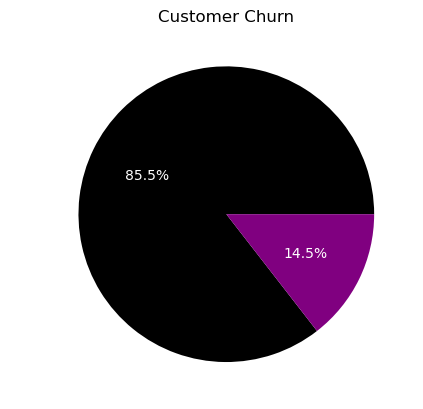

In [131]:
#Univariate analysis of the dataset
churn_counts = data['churn'].value_counts()

plt.pie(x=churn_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', colors=['black', 'purple'], textprops={'color': 'white'})
plt.title('Customer Churn')
plt.show()

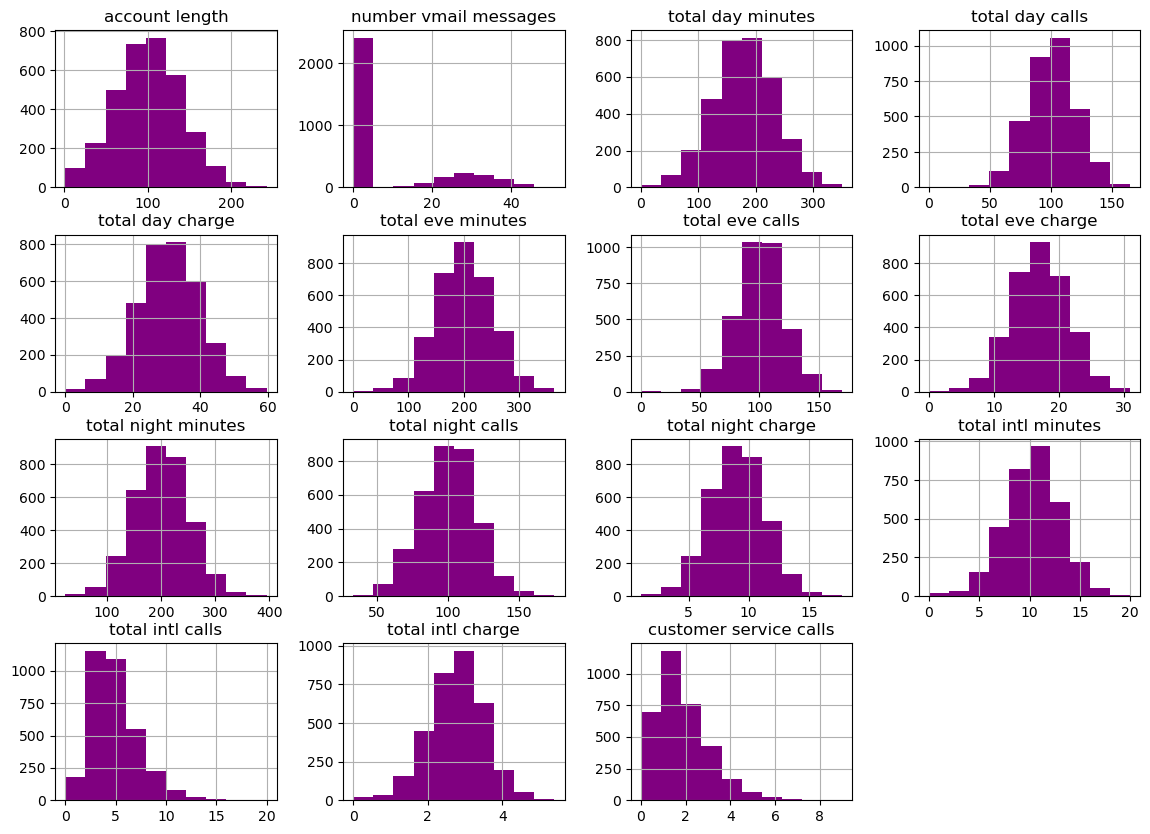

In [132]:
# distribution of features
data.drop(columns='churn').hist(figsize=(14,10), color='purple');


In [133]:
# Define churn_rate_data
churn_rate_data = data.groupby('state')['churn'].mean().reset_index(name='Percentage Churn')

# Find the top states with highest churn rate
top10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).head(5)
top10 = pd.DataFrame(top10)
top10.head()

,state,Percentage Churn
31,NJ,0.264706
4,CA,0.264706
43,TX,0.250000
20,MD,0.242857
40,SC,0.233333


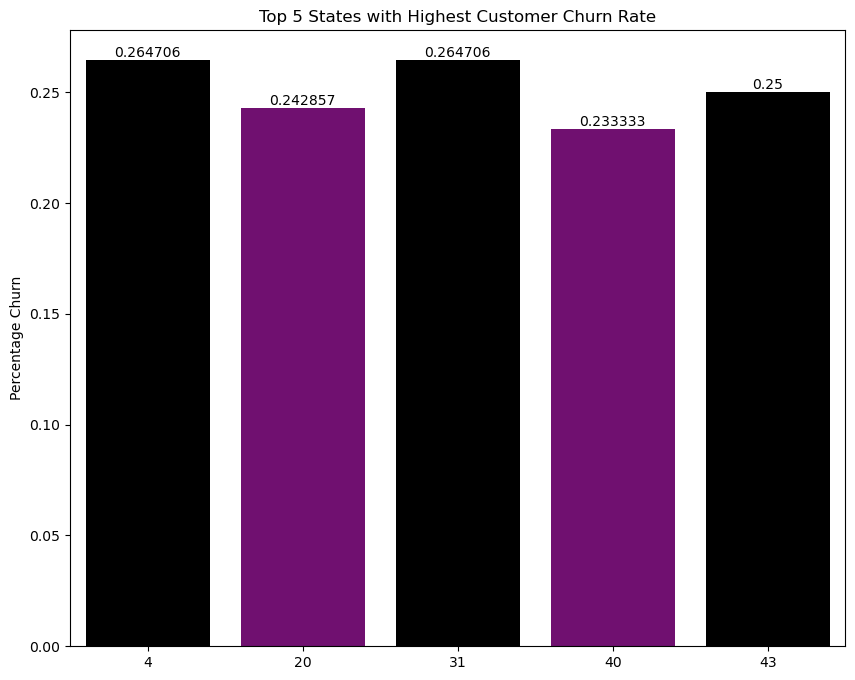

In [134]:
# Define custom colors
custom_palette = ['black', 'purple']

# Visulaize the top 10 States with Customer Churn
plt.figure(figsize=(10,8))
ax = sns.barplot(x=top10.index, y='Percentage Churn', data=top10, palette=custom_palette)
plt.title("Top 5 States with Highest Customer Churn Rate")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [135]:
#Find States with lowest customer churn using .tail()
bottom10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).tail(5)
bottom10 = pd.DataFrame(bottom10)
bottom10['Percentage Churn'] = bottom10['Percentage Churn'] 
bottom10.head()

,state,Percentage Churn
12,IA,0.068182
45,VA,0.064935
3,AZ,0.062500
0,AK,0.057692
11,HI,0.056604


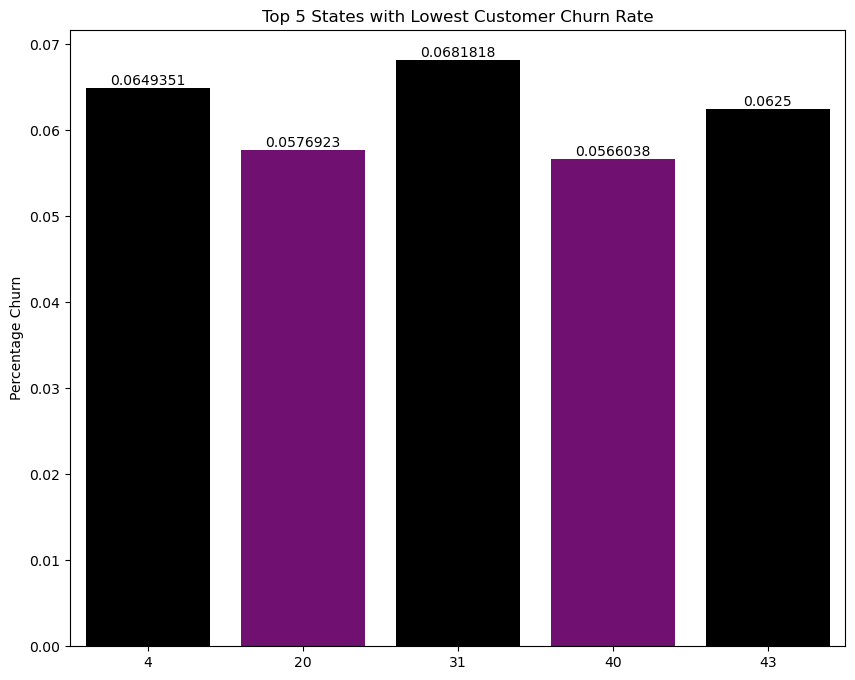

In [136]:
# Define custom colors
custom_palette = ['black', 'purple']

# Visualize the outcome using sns.barplot
plt.figure(figsize=(10,8))
sns.barplot(x=top10.index, y='Percentage Churn', data=bottom10, palette=custom_palette)
plt.title("Top 5 States with Lowest Customer Churn Rate")

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()


Feature engineering.

In [137]:
# Checking Categorical predictors/features 
display(data['area code'].value_counts())
display(data['international plan'].value_counts())
display(data['voice mail plan'].value_counts())

area code
415    1655
510     840
408     838
Name: count, dtype: int64

international plan
no     3010
yes     323
Name: count, dtype: int64

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [138]:
# Converting the non-numerical labels into numerical
label_encoder = LabelEncoder()

data['area code'] = label_encoder.fit_transform(data['area code'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

# convert true and false values for churn
data['churn'] = label_encoder.fit_transform(data['churn'])

# Display the first 5 rows of the dataset
data.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


## Bivariate Analysis

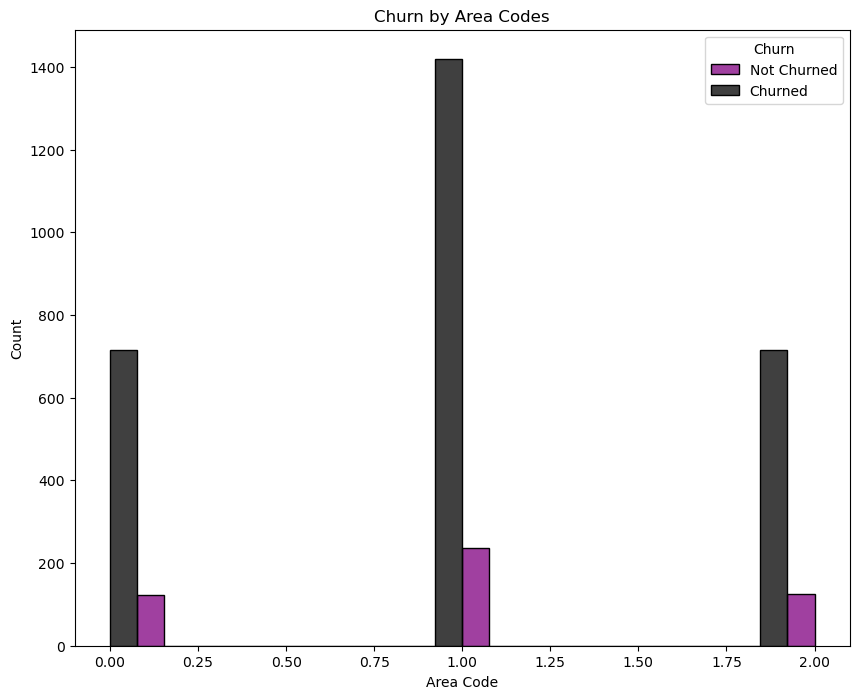

In [139]:
# Churn by area codes
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='area code', hue='churn', multiple='dodge', palette=['black', 'purple'])

# Adding a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjusting labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Adding a title
plt.title('Churn by Area Codes')

# Show the plot
plt.show()


Relationship between various continuous features in the telecom churn dataset and how do they contribute to the prediction of churn?

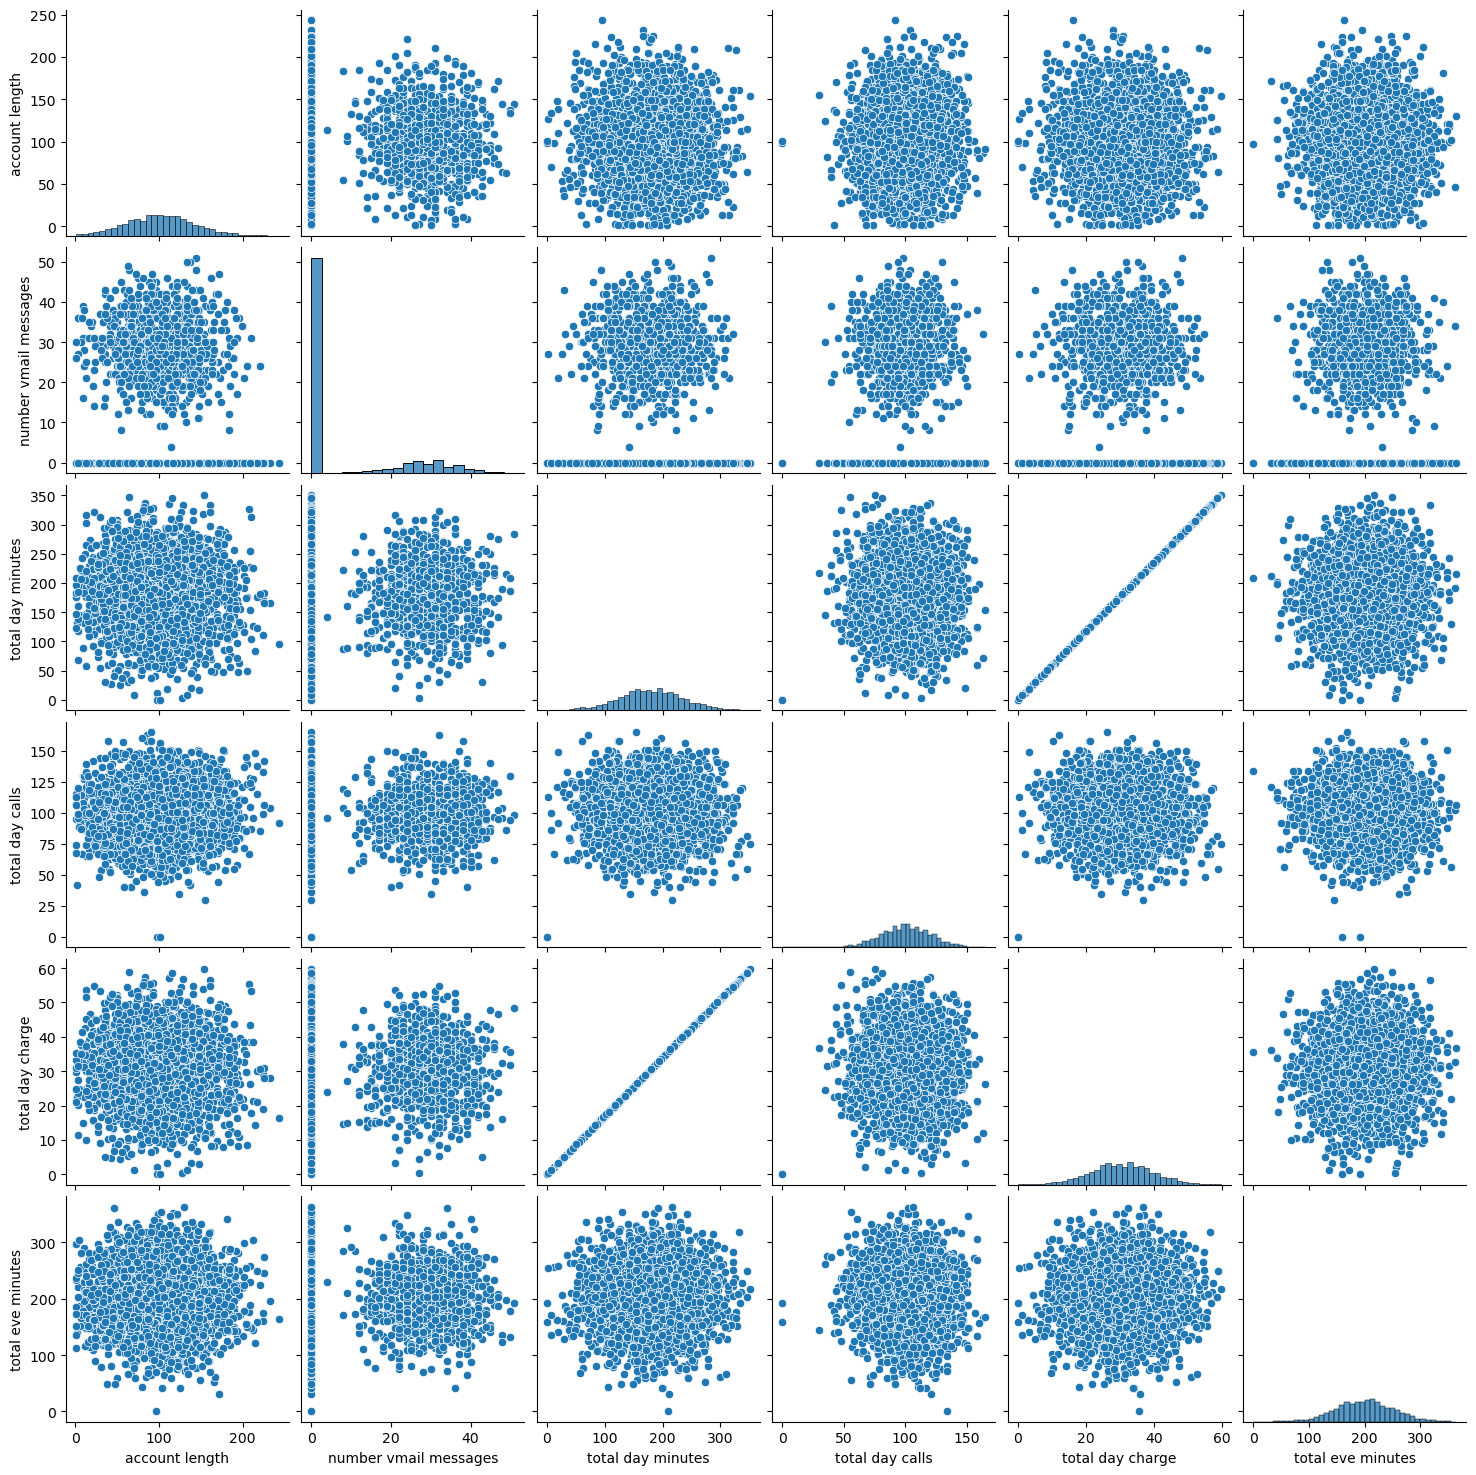

In [140]:
continous_cols = ['account length','number vmail messages','total day minutes',
                 'total day calls','total day charge','total eve minutes',
                  'total night minutes','total night charge','total intl minutes',
                  'total intl charge','customer service calls','churn']

# Plot pairwise relationships in a dataset
sns.pairplot(data=data[continous_cols[0:6]], palette='purple');

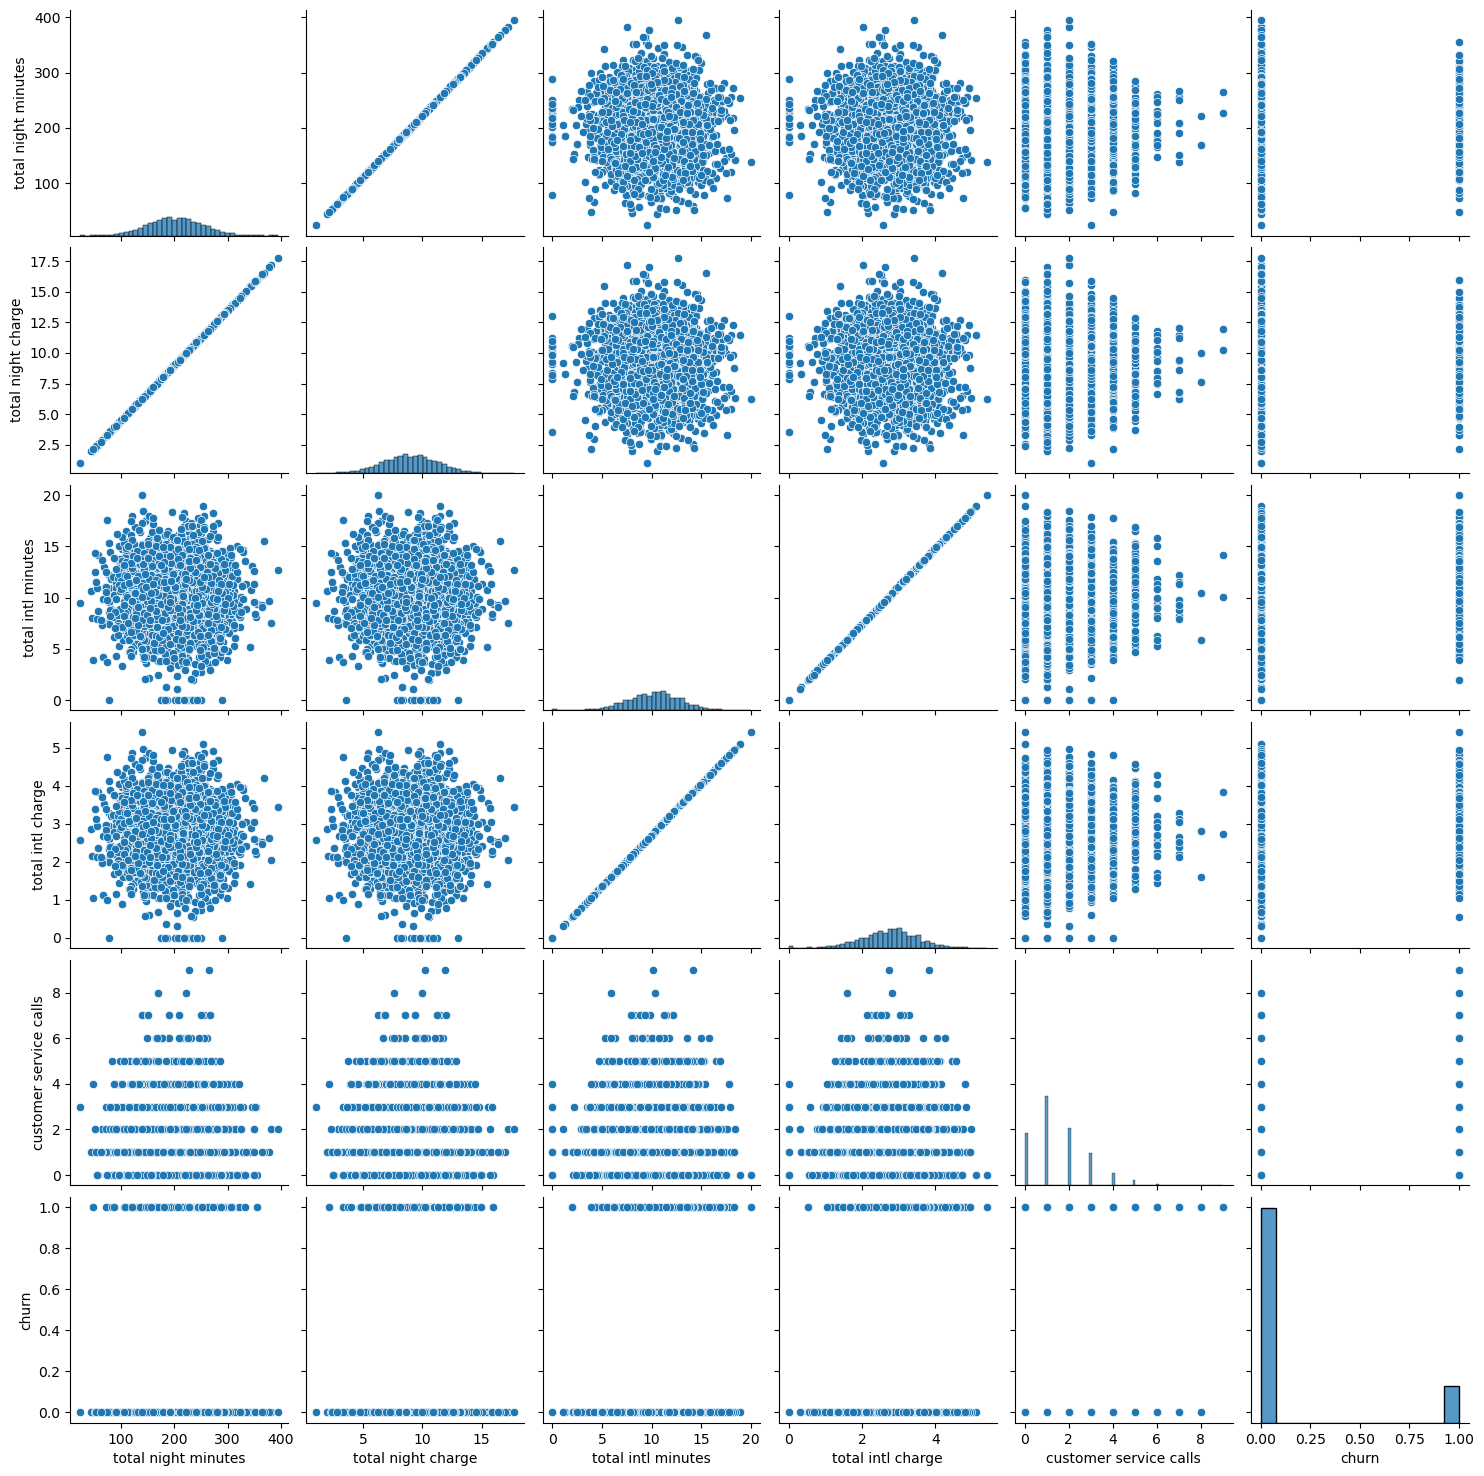

In [141]:
sns.pairplot(data=data[continous_cols[6:]], palette='purple');


Are customers subscribed to a voice mail plan likely to churn?

In [142]:
def plot_churn_vs_plan(data, plan_column):
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(12,8), color=['black', 'purple'])
    plt.show()
    
    # selecting the plan(either international or voice mail plan)
    plan = sum(data[plan_column] == 1)
    total = len(data[plan_column])
    total_plan = (plan / total) * 100

    print('Customers subscribed to the {} : {:.2f}%'.format(plan_column, total_plan))

    # Calculate churned with plan subscribed to
    plan_churn = data[(data['churn'] == True) & (data[plan_column] == 1)]
    total_customers_with_plan = sum(data[plan_column] == 1)
    
    if total_customers_with_plan != 0:
        churned_with_plan = len(plan_churn)
        percentage_churned_with_plan = 100 * churned_with_plan / total_customers_with_plan

        print('Percentage of subscribed customers who churned with {} : {:.2f}%'.format
              (plan_column, percentage_churned_with_plan))
    else:
        print('No customers subscribed to the {}.'.format(plan_column))

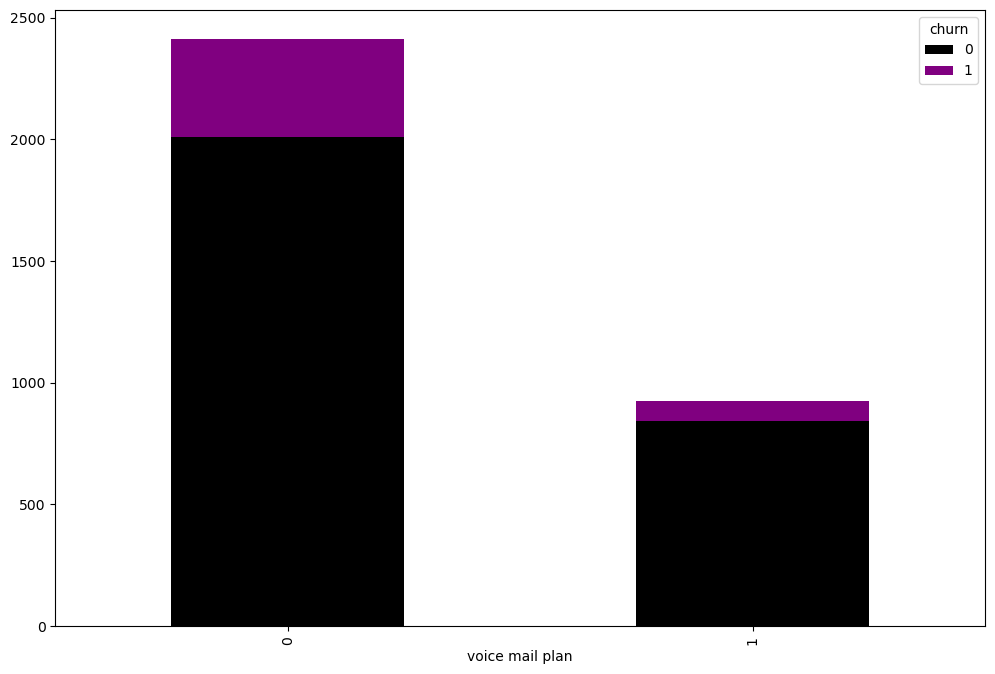

Customers subscribed to the voice mail plan : 27.66%
Percentage of subscribed customers who churned with voice mail plan : 8.68%


In [143]:

# Call the function
plot_churn_vs_plan(data, 'voice mail plan')

plot_churn_vs_plan(data,'voice mail plan')

Are customers subscribed to a International plan likely to churn?

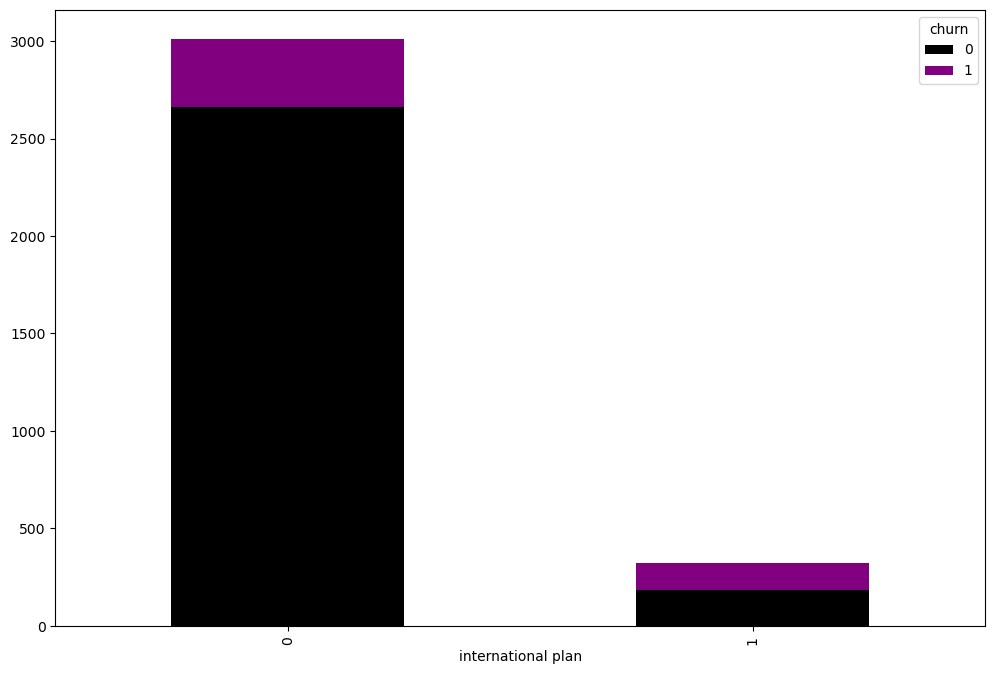

Customers subscribed to the international plan : 9.69%
Percentage of subscribed customers who churned with international plan : 42.41%


In [144]:
plot_churn_vs_plan(data,'international plan')

Customers subscribed to the international plan : 9.69%
Percentage of subscribed customers who churned with international plan : 42.41%


## Multivariate Analysis

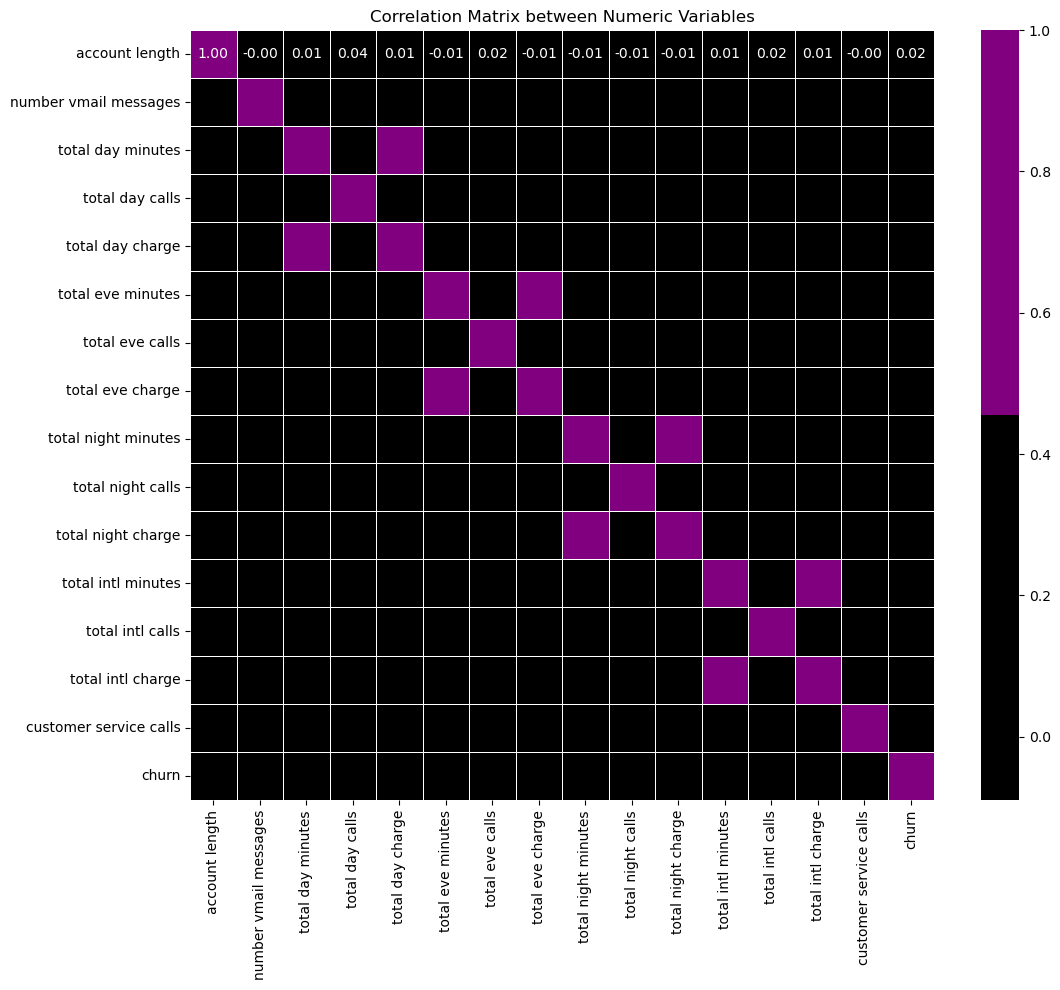

In [145]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Define custom color palette
custom_palette = sns.color_palette(['black', 'purple'])

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=custom_palette, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Numeric Variables')
plt.show()


# 4. Modelling

In [146]:
#dropping these columns
frenzy_data = data
frenzy_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [147]:
# droping the state column
frenzy_data.drop('state',axis = 1,inplace=True)

In [148]:
frenzy_data.shape

(3333, 19)

## a). Splitting the data into Train and Test sets

since the dataset contains 3,333 observations will split the dataset to have a test size of 20% and a random state of 42

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

In [150]:
y = frenzy_data['churn']
X = frenzy_data.drop('churn',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

## Standardizing and dealing with class imbalances

In [151]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# convert X_train and X_test_scaled into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

In [152]:
X_train

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,2,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,1,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,1,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,1,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,2,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,2,0,0,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,1,0,0,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,0,0,0,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,1,0,0,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


In [153]:
# Dealing with class imbalance
smote = SMOTE()
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train)

## b). Train the models part 1

Logistic regression classifier model

Adaboost Classifier model

Gradient Boosting classifier mode

In [154]:
# Logistic regression Classifier predictions
logreg = LogisticRegression(fit_intercept=False, C=1e10, solver='liblinear')
if len(X_train_resampled) > 0:
    logreg.fit(X_train_resampled, y_train_resampled)
    logreg_train_preds = logreg.predict(X_train_resampled)
    logreg_test_preds = logreg.predict(X_test_scaled)
else:
    print("Training data has no samples.")
logreg = LogisticRegression(fit_intercept = False, C = 1e10, solver ='liblinear')
logreg.fit(X_train_resampled,y_train_resampled)
logreg_train_preds = logreg.predict(X_train_resampled)
logreg_test_preds = logreg.predict(X_test_scaled)

# AdaBoost model predictions
adaboost_clf = AdaBoostClassifier(random_state = 42)
adaboost_clf.fit(X_train_resampled,y_train_resampled)
adaboost_test_preds = adaboost_clf.predict(X_test_scaled)

# GradientBoosting model predictions
gbt_clf = GradientBoostingClassifier(random_state = 42)
gbt_clf.fit(X_train_resampled,y_train_resampled)
gbt_clf_train_preds = gbt_clf.predict(X_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(X_test_scaled)

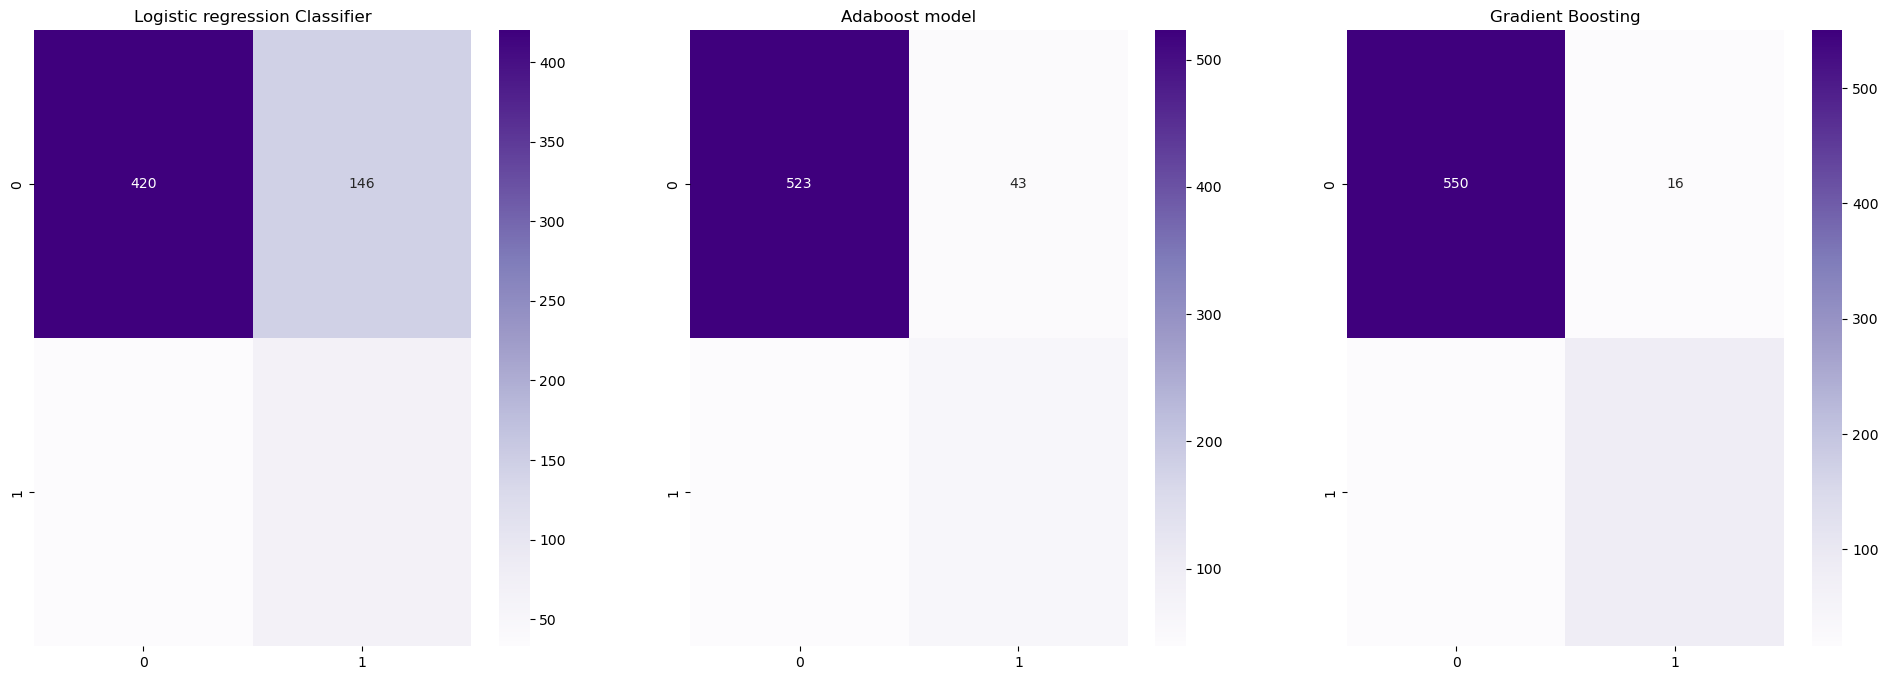

In [155]:
# Calculate the confusion matrix for the logistic regression classifier model
cm1 = confusion_matrix(y_test, logreg.predict(X_test_scaled))

# Calculate the confusion matrix for the Decision Tree model
cm2 = confusion_matrix(y_test, adaboost_clf.predict(X_test_scaled))

# Calculate the confusion matrix for the Gradient Boosting model
cm3 = confusion_matrix(y_test, gbt_clf.predict(X_test_scaled))

# Create subplots for confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot confusion matrix for logistic regression
sns.heatmap(cm1, annot=True, fmt='d', cmap='Purples', ax=ax1)
ax1.set_title('Logistic regression Classifier')

# Plot confusion matrix for Decision Tree
sns.heatmap(cm2, annot=True, fmt='d', cmap='Purples', ax=ax2)
ax2.set_title('Adaboost model')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(cm3, annot=True, fmt='d', cmap='Purples', ax=ax3)
ax3.set_title("Gradient Boosting")

plt.show()

## i). Logistic regression model metrics.

(Baseline Vanilla Model)

In [156]:
# Display metrics of our 3 models
def display_metrics(true, preds):
    
    print(f'Accuracy: {accuracy_score(true, preds)}')
    print(f'F1-Score: {f1_score(true, preds)}')
    print(f'Recall: {recall_score(true,preds)}')

# Logistic Regression Model Metrics (Vanilla)
print('Logistic Regression\n')
print('----\n')
display_metrics(y_test, logreg_test_preds)

Logistic Regression

----

Accuracy: 0.7316341829085458
F1-Score: 0.43174603174603177
Recall: 0.6732673267326733


## ii). Adoboost model metrics

In [157]:
print('Adaboost Model\n')
print('----\n')
display_metrics(y_test, adaboost_test_preds)

Adaboost Model

----

Accuracy: 0.8770614692653673
F1-Score: 0.6019417475728155
Recall: 0.6138613861386139


## iii). Gradient boosting model matrics.

In [158]:
print('Gradient Boosting Model\n')
print('----\n')
display_metrics(y_test, gbt_clf_test_preds)

Gradient Boosting Model

----

Accuracy: 0.9460269865067467
F1-Score: 0.8181818181818183
Recall: 0.801980198019802


# c). Training the models part 2

K-Nearest Neighbors

Decision Tree

Random forest classifier

In [159]:
X_train_resampled = np.ascontiguousarray(X_train_resampled)
X

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [160]:
# # K-Nearest Neighbors model
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_resampled, y_train_resampled)
# y_pred_knn = knn.predict(X_test_scaled)

# Decision Tree model
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split=10, random_state = 42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_scaled)


# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)

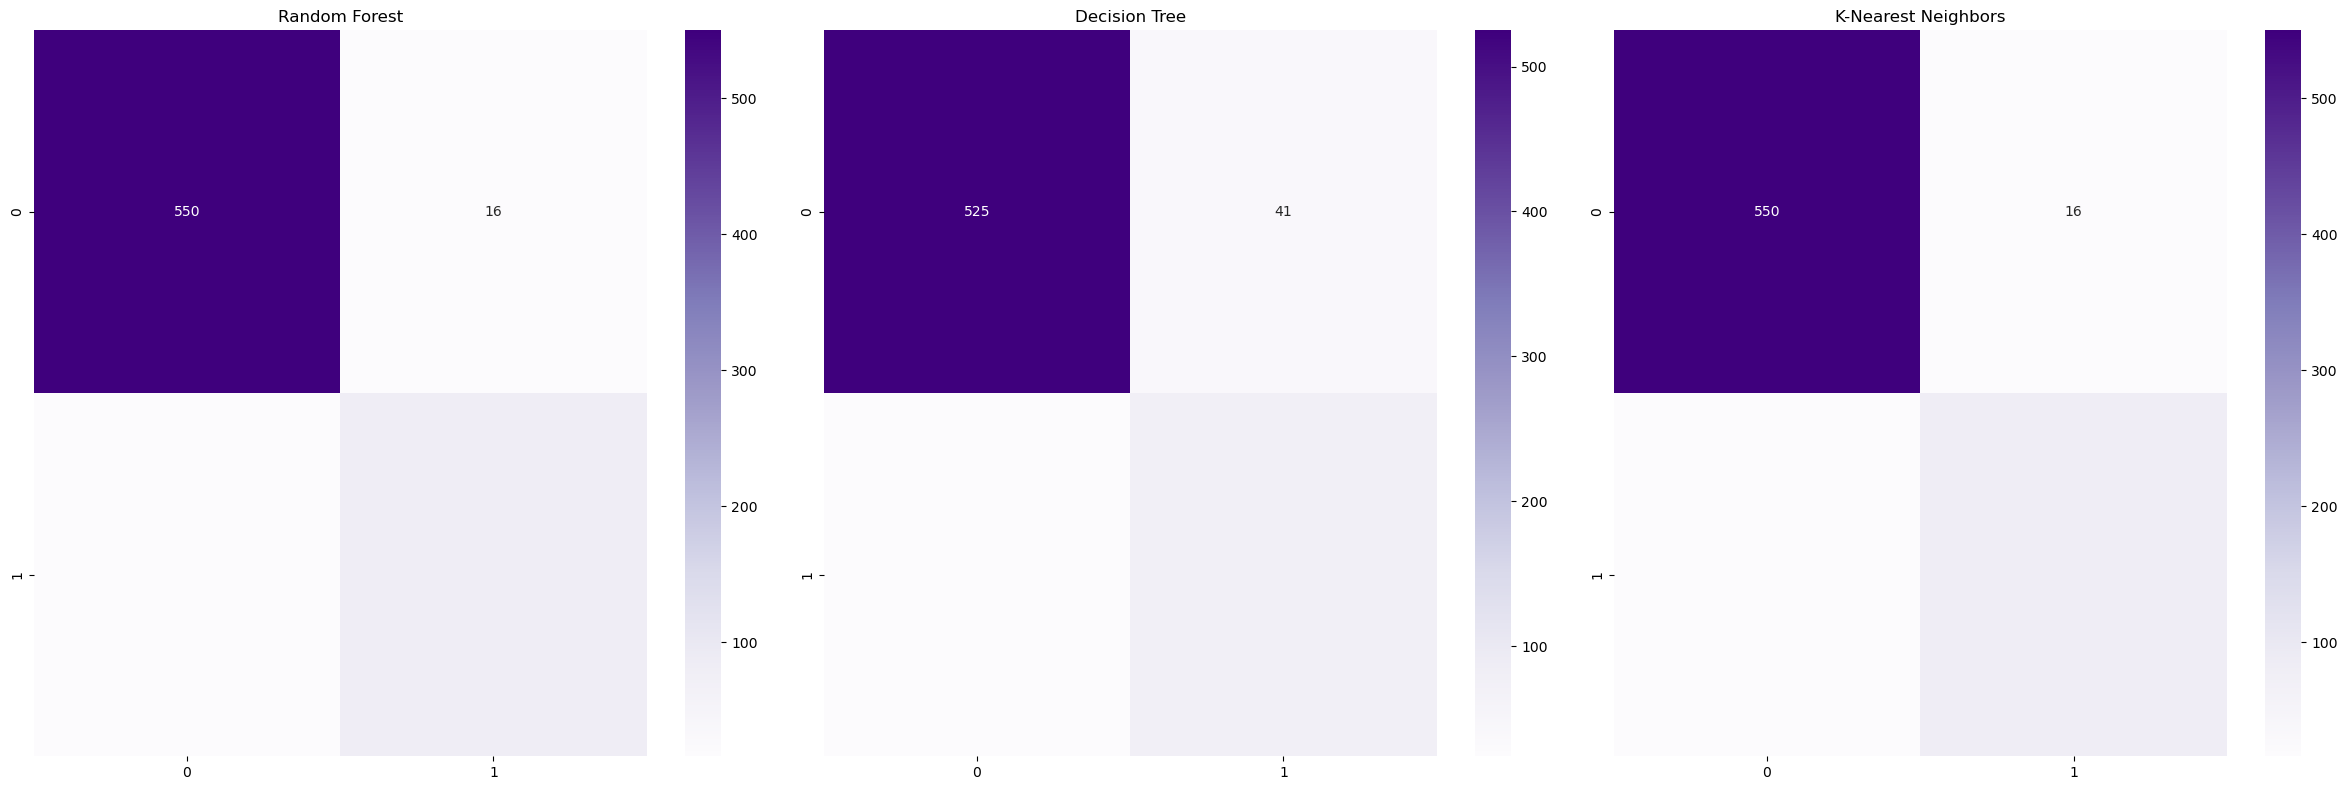

In [161]:
# Calculate the confusion matrix for the Random Forest model
cm1 = confusion_matrix(y_test, rf.predict(X_test_scaled))

# Calculate the confusion matrix for the Decision Tree model
cm2 = confusion_matrix(y_test, dt.predict(X_test_scaled))

# # Calculate the confusion matrix for the K-Nearest Neighbors model
# cm3 = confusion_matrix(y_test, knn.predict(X_test_scaled))

# Create subplots for confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot confusion matrix for Random Forest
sns.heatmap(cm1, annot=True, fmt='d', cmap='Purples', ax=ax1)
ax1.set_title("Random Forest")

# Plot confusion matrix for Decision Tree
sns.heatmap(cm2, annot=True, fmt='d', cmap='Purples', ax=ax2)
ax2.set_title("Decision Tree")

# Plot confusion matrix for K-Nearest Neighbors
sns.heatmap(cm3, annot=True, fmt='d', cmap='Purples', ax=ax3)
ax3.set_title("K-Nearest Neighbors")

plt.tight_layout()
plt.show()

In [162]:
print('Random Forest Model\n')
print('----\n')
display_metrics(y_test,y_pred_rf)

Random Forest Model

----

Accuracy: 0.9475262368815592
F1-Score: 0.8241206030150754
Recall: 0.8118811881188119


In [163]:
print('Decision Tree Model\n')
print('----\n')
display_metrics(y_test,y_pred_dt)

Decision Tree Model

----

Accuracy: 0.9025487256371814
F1-Score: 0.7031963470319635
Recall: 0.7623762376237624


In [164]:
# print('K-Nearest Neighbors classifier Model\n')
# print('----\n')
# display_metrics(y_test,y_pred_knn)

# d).  Evaluating Our best 3 models (Decision Tree, Random Forest & Gradient Boosting)

In [165]:

# classification report of Decision Tree
dt_classification_report = classification_report(y_test, y_pred_dt)
print(dt_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Random Forest Cross-Val Score (k=5):')
print(cross_val_score(dt, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       566
           1       0.65      0.76      0.70       101

    accuracy                           0.90       667
   macro avg       0.80      0.84      0.82       667
weighted avg       0.91      0.90      0.91       667

Mean Random Forest Cross-Val Score (k=5):
0.9336953145049097


In [166]:
# classification report of Random Forest
rf_classification_report = classification_report(y_test, y_pred_rf)
print(rf_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Random Forest Cross-Val Score (k=5):')
print(cross_val_score(rf, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.84      0.81      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667

Mean Random Forest Cross-Val Score (k=5):
0.9549972761367066


The accuracy of the model is 0.94, meaning that the model correctly predicted 94% of the test sample in the data. A recall of 0.79 for class 1 means that the model was able to find 79% of all positive(churn) test predictions

In [167]:
# classification report of Gradient boosting
gradientBoost_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gradientBoost_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Gradient Boosting Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.84      0.80      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667

Mean Gradient Boosting Cross-Val Score (k=5):


0.9534980257618939



The accuracy of the model is 0.95, meaning that the model correctly predicted 95% of the test sample in the data. A recall of 0.81 for class 1 means that the model was able to find 81% of all positive(churn) test predictions.

## 5). Evaluation of our Final Model.

Hyperparameter tuning (Decision tree model)

In [168]:
# Tuning a Random Forest model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

dt_grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV to training data 
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# best set of hyperparameters
best_hyperparams = dt_grid_search.best_params_
best_hyperparams

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [169]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
# print("Best Parameter Combination Found During Grid Search:")



Mean Training Score: 87.39%
Mean Test Score: 91.30%


The mean training score of 87.44% and the mean test score of 87.41% indicate that the model's performance is consistent across both the training and test sets. This suggests that the model is generalizing well and is not overfitting to the training data. However, the scores are relatively close, indicating that there might be slight overfitting or underfitting.
Hyperparameter tuning may be necessary to improve the model's performance on the test set.







## Hyperparameter tuning (Random Forest Modeling)

In [170]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, return_train_score=True, n_jobs=-1)

# refit train data
rf_grid_search.fit(X_train_resampled, y_train_resampled)
y_pred_rftuned = rf_grid_search.predict(X_test_scaled)
best_params = rf_grid_search.best_params_
best_params


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [171]:
# Mean training score
rf_grid_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_grid_testing_score = rf_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {rf_grid_training_score :.2%}")
print(f"Mean Test Score: {rf_grid_testing_score :.2%}")

Mean Training Score: 91.16%
Mean Test Score: 95.20%


## Comapring the two Tuned Model

In [172]:

dt_score = dt_grid_search.score(X_test_scaled, y_test)
rf_score = rf_grid_search.score(X_test_scaled, y_test)

print('Tuned Decision tree grid search: ', dt_score)
print('Tuned Random forest grid search: ', rf_score)

Tuned Decision tree grid search:  0.9130434782608695
Tuned Random forest grid search:  0.952023988005997


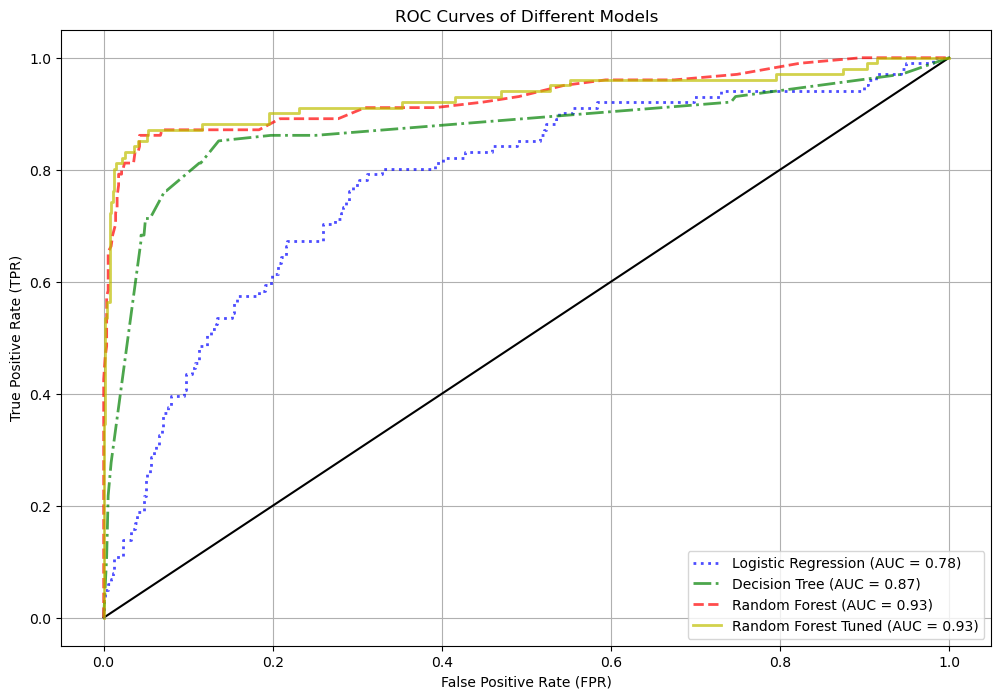

In [173]:
# predictions on the test set using each model
y_pred_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:,1]
y_pred_rfTuned = rf_grid_search.predict_proba(X_test_scaled)[:,1]

# false positive rate (FPR) and true positive rate (TPR) for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_rfTuned, tpr_rfTuned, thresholds_rfTuned = roc_curve(y_test, y_pred_rfTuned)

#area under the ROC curve (AUC) for each model
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_rfTuned = roc_auc_score(y_test, y_pred_rfTuned)

fig = plt.figure(figsize = (12,8))
plt.plot([0,1],[0,1], 'k')
plt.plot(fpr_lr, tpr_lr, 'b', label='Logistic Regression (AUC = %0.2f)'% auc_lr, lw=2, alpha=0.7, linestyle=":")
plt.plot(fpr_dt, tpr_dt, 'g', label='Decision Tree (AUC = %0.2f)'% auc_dt, lw=2, alpha=0.7, linestyle="-.")
plt.plot(fpr_rf, tpr_rf, 'r', label='Random Forest (AUC = %0.2f)'% auc_rf, lw=2, alpha=0.7, linestyle="--")
plt.plot(fpr_rfTuned, tpr_rfTuned, 'y', label='Random Forest Tuned (AUC = %0.2f)'% auc_rfTuned, lw=2, alpha=0.7, linestyle="-")

plt.title("ROC Curves of Different Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

plt.grid()
plt.show()

Based on our ROC curve we can conclude that both the Random forest and tuned random forest models are our best model since they have an AUC of 0.93 and they are hugging the top left side of our graph, they also have a high recall of around 0.82 when predicting a customer will churn as compared to the other models

## Feature importance of our random classsifier.

In [174]:
import pandas as pd

# Assuming X_train_resampled is a numpy array
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Now X_train_resampled_df is a DataFrame


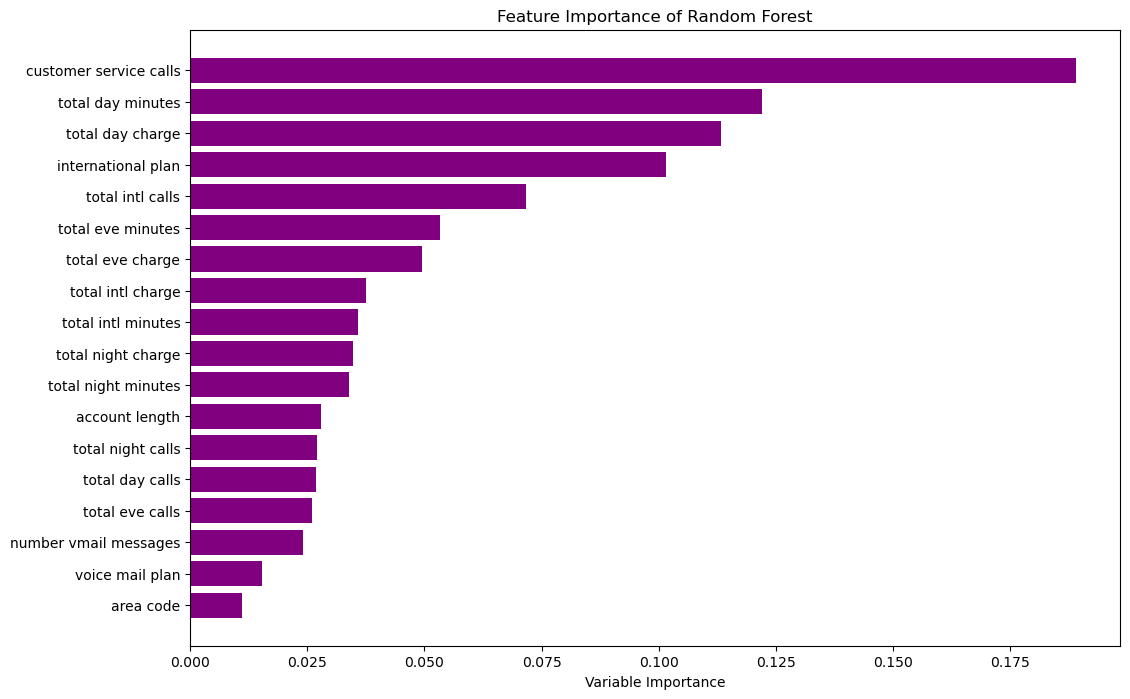

In [175]:
importance = rf.feature_importances_
sorted_index = np.argsort(importance)

# Plot the feature importance with purple color
plt.figure(figsize =(12,8))
plt.barh(range(X_train_resampled.shape[1]), importance[sorted_index], color='purple')  # Set color to 'purple'
plt.yticks(range(X_train_resampled.shape[1]), X_train_resampled.columns[sorted_index])
plt.xlabel("Variable Importance")
plt.title("Feature Importance of Random Forest")
plt.show()


In [176]:
X_train_resampled

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,1.000000,1.0,0.0,0.0,0.000000,0.266801,0.459259,0.266892,0.450096,0.370588,0.450016,0.648198,0.598592,0.648536,0.330000,0.315789,0.329630,0.222222
1,0.442149,0.5,0.0,0.0,0.000000,0.314187,0.555556,0.314189,0.532582,0.647059,0.532514,0.499462,0.422535,0.499701,0.205000,0.210526,0.205556,0.444444
2,0.305785,0.5,1.0,0.0,0.000000,0.631246,0.355556,0.631250,0.899093,0.652941,0.899385,0.497041,0.500000,0.497310,0.435000,0.473684,0.435185,0.111111
3,0.578512,0.5,0.0,0.0,0.000000,0.356979,0.503704,0.356926,0.494913,0.364706,0.494985,0.316299,0.669014,0.316796,0.400000,0.105263,0.400000,0.111111
4,0.351240,1.0,0.0,0.0,0.000000,0.613728,0.488889,0.613682,0.732197,0.452941,0.732449,0.513179,0.542254,0.513449,0.225000,0.157895,0.225926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.467760,0.5,0.0,0.0,0.000000,0.366155,0.662250,0.366108,0.585131,0.472496,0.585134,0.311993,0.467613,0.312392,0.637665,0.147340,0.637653,0.444444
4564,0.357077,0.5,0.0,0.0,0.000000,0.759426,0.684331,0.759440,0.657289,0.639819,0.657427,0.367823,0.565055,0.367992,0.707693,0.120721,0.708379,0.094794
4565,0.247585,0.5,0.0,0.0,0.000000,0.448007,0.519947,0.448010,0.365478,0.568061,0.365526,0.420275,0.388455,0.420297,0.385662,0.163602,0.385772,0.510486
4566,0.485792,1.0,1.0,1.0,0.572995,0.471823,0.444426,0.471804,0.743747,0.460120,0.743858,0.462271,0.675238,0.462458,0.594467,0.128712,0.594673,0.308582


Saving our model into a pickle file.

In [177]:
import pickle

In [178]:

# open the file for writing
pic_out = open('picklefile','wb')

#write model into picklefile
pickle.dump(rf_grid_search,pic_out)

# 6. Conclusion


In conclusion, the results of the mean random forest cross-validation score (k=5) on predicting the churn rate showed an accuracy of 0.95, with a weighted average of 0.95. The precision, recall, and f1-score for class 0 (not churned) were 0.97, 0.97, and 0.97, respectively. For class 1 (churned), the precision, recall, and f1-score were 0.82, 0.82, and 0.82, respectively. The macro average and weighted average for precision, recall, and f1-score were 0.89 and 0.95, respectively.

These results indicate that the random forest model performed well in terms of accuracy, with a high weighted average for precision, recall, and f1-score. The model's performance in predicting class 0 (not churned) was slightly better compared to class 1 (churned), with a higher precision, recall, and f1-score. Overall, the random forest model was considered the best model for predicting the churn rate.

# 7. Recommendations


The company should consider implementing this ideas to improve the model (Reduce churning):

Feature Engineering:

It's possible to enhance the prediction of churn by creating new features from the existing data. For example, a feature for the average daily or monthly charge, a feature for the average call duration or a feature for the region covered instead of many states could be generated. These new features could offer deeper insights into customer behavior and contribute to a better prediction of churn.

Data collection:

Undertake a customer satisfaction survey to collect info on how the customers rate Network Coverage and Quality, customer service and improve on these areas.

Collect personal customer data such as Age,Gender and Marital status which may enable the company to create custom plans to cater for this groups.

Offering competitive pricing and packages: Customers are more likely to switch to another provider if they feel that they are not getting good value for their money.

Offering loyalty programs: Offering incentives and rewards for customers who stay with the provider for a longer period of time can reduce churn rates.